In [1]:
import scipy.io.wavfile as wav
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fs, x1 = wav.read('samples/recording1.wav')
x1 = x1 / np.max(abs(x1))

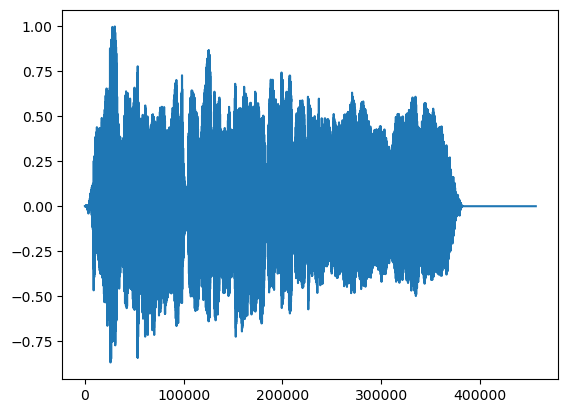

In [3]:
plt.plot(x1)

In [4]:
f01, voiced_flag, voiced_probs = librosa.pyin(x1, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f01 = f01[~np.isnan(f01)]

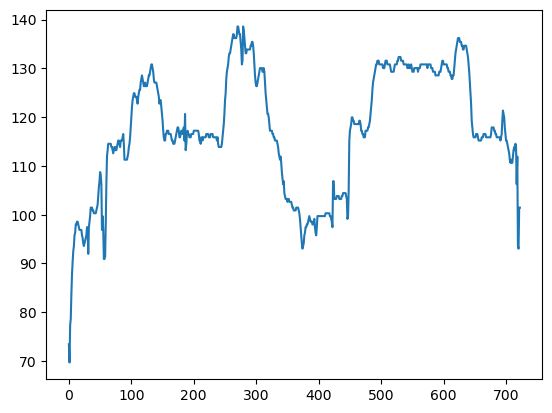

In [5]:
plt.plot(f01)

In [6]:
fs, x2 = wav.read('samples/recording2.wav')
x2 = x2 / np.max(abs(x2))

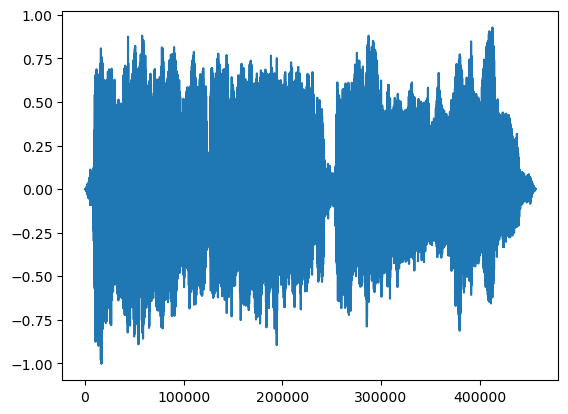

In [7]:
plt.plot(x2)

In [8]:
f02, voiced_flag, voiced_probs = librosa.pyin(x2, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f02 = f02[~np.isnan(f02)]

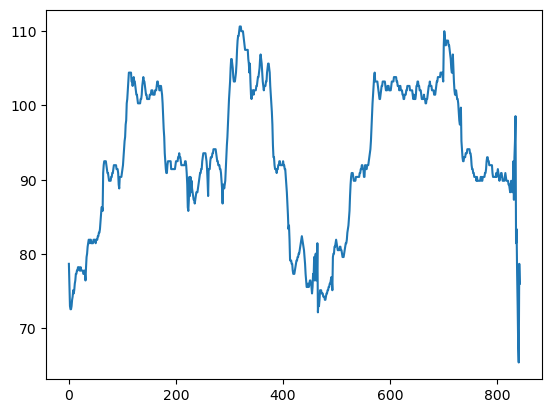

In [9]:
plt.plot(f02)

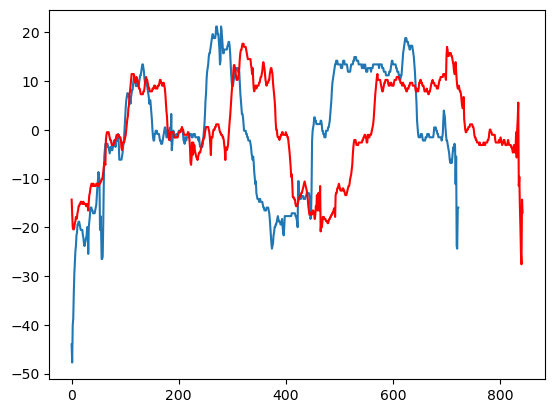

In [10]:
f01 = f01 - np.mean(f01)
f02 = f02 - np.mean(f02)
plt.plot(f01)
plt.plot(f02, c='r')

In [11]:
D, wp = librosa.sequence.dtw(f01, f02)

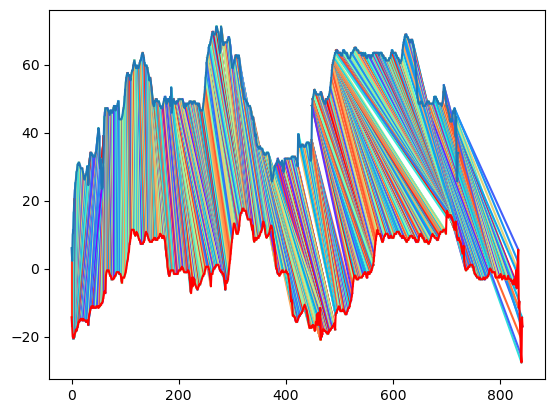

In [12]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(wp)))

for i, (idx1, idx2) in enumerate(wp):
    color = np.random.randint(len(colors))
    plt.plot([wp[i][0], wp[i][1]], [f01[wp[i][0]] + 50, f02[wp[i][1]]], color=colors[color])
    
plt.plot(f01 + 50)
plt.plot(f02, c='r')

In [27]:
D2, wp2 = librosa.sequence.dtw(f01, f02, global_constraints=True, band_rad=0.001, subseq=True)

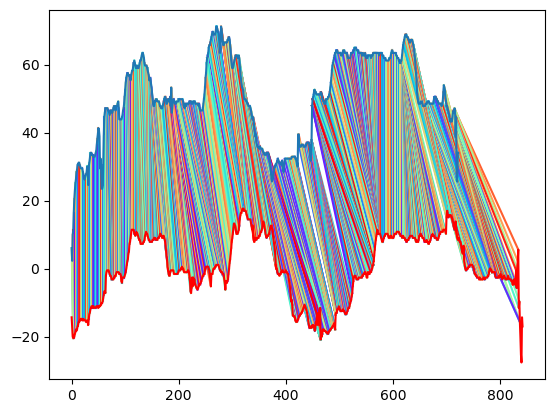

In [28]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(wp2)))

for i, (idx1, idx2) in enumerate(wp2):
    color = np.random.randint(len(colors))
    plt.plot([wp2[i][0], wp2[i][1]], [f01[wp2[i][0]] + 50, f02[wp2[i][1]]], color=colors[color])
    
plt.plot(f01 + 50)
plt.plot(f02, c='r')